*Technical University of Munich<br>
Professorship of Environmental Sensing and Modeling<br><br>*
**Author:**  Daniel Kühbacher<br>
**Date:**  26.10.2024

--- 

# Inventory Timeprofiles

<!--Notebook description and usage information-->
This notebook is to generate and visualize different timeprofiles used in the inventory.


In [13]:
import sys

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import geopandas as gpd
import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

# import custom modules
sys.path.append('../../utils')
import data_paths
import traffic_counts

Loading BokehJS ...

# Initilize data objects

In [14]:
counts = traffic_counts.TrafficCounts()

/Users/daniel_tum/Documents/code/drive-inventory/notebooks/plotting/../../utils/traffic_counts.py:91: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('1m').median()


In [15]:
colors = matplotlib.colormaps['Dark2'].colors

# Plot diurnal cycles

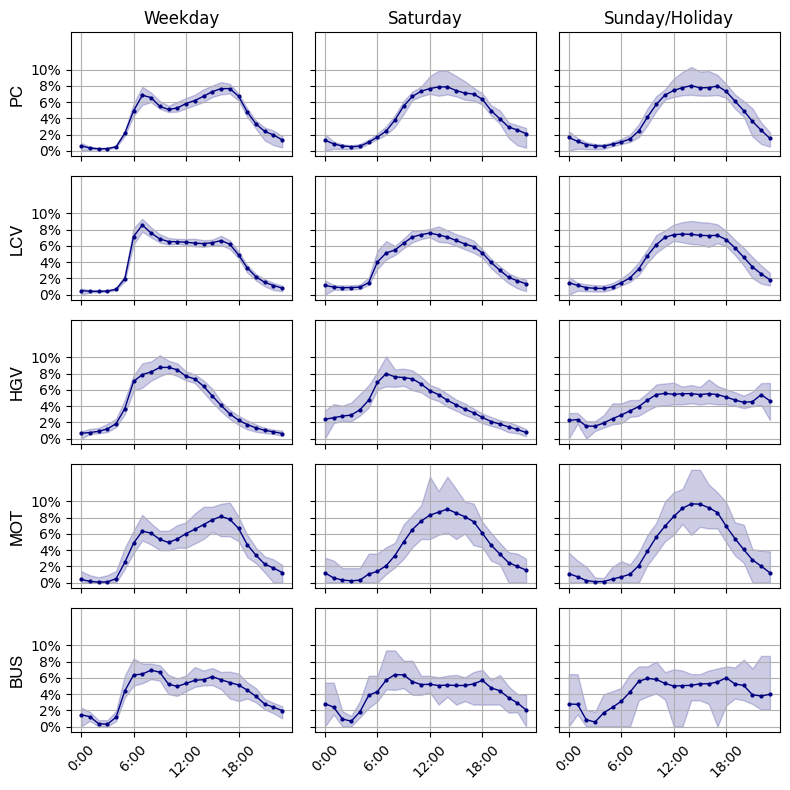

In [16]:
fig, ax = plt.subplots(5,3, figsize = (8,8), sharex=True, sharey= True, tight_layout = True)
month = 5
col=0
row=0

for vc in ['PC', 'LCV', 'HGV', 'MOT', 'BUS']:
    ax[col, 0].set_ylabel(vc, font = 'Helvetica', fontsize = 12)
    for dt in [1,3,4]:

        cycle = counts.daily_cycles.loc[:, :, dt, vc]

        (cycle.mean()*100).plot(ax = ax[col,row], linewidth = 1., color = 'navy', marker = 'o', markersize = 2)
        ax[col,row].fill_between(cycle.mean().index, cycle.min()*100, cycle.max()*100, color = 'navy', alpha = 0.2)
        ax[col,row].grid(True)
        
        row +=1
    row = 0
    col +=1
ax[0,0].set_title('Weekday')
ax[0,1].set_title('Saturday')
ax[0,2].set_title('Sunday/Holiday')

yticks = [0, 2, 4, 6, 8, 10]
ytick_labels = [f'{tick}%' for tick in yticks]  # You can customize labels if needed

# Set the xtick marks and labels on the axis object
ax[0,0].set_yticks(yticks)
ax[0,0].set_yticklabels(ytick_labels)

for a in ax.flatten():
    xticks = range(0,24,6)
    xtick_labels = [f'{tick}:00' for tick in xticks]  # You can customize labels if needed
    a.minorticks_off()
    a.set_xticks(xticks)
    a.set_xticklabels(xtick_labels, rotation = 45)
    
plt.show()

Text(0.5, 1.0, 'Sunday/Holiday')

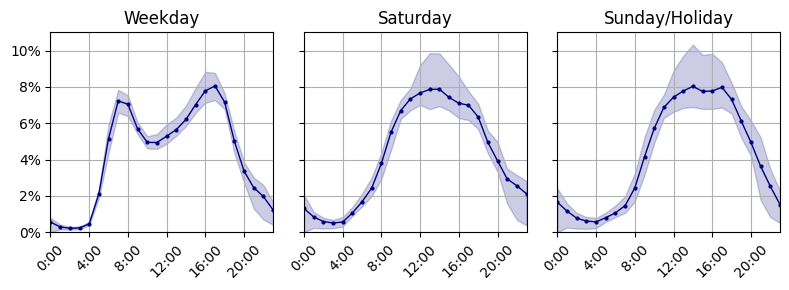

In [17]:
fig, ax = plt.subplots(1,3, figsize = (8,3), sharex=True, sharey= True, tight_layout = True)
year = 2019

col=0

for vc in ['PC']:
    for dt in [0,3,4]:
        
        cycle = counts.daily_cycles.loc[:, :, dt, vc]
        
        (cycle.mean()*100).plot(ax = ax[col], linewidth = 1., color = 'navy', marker = 'o', markersize = 2)
        ax[col].fill_between(cycle.mean().index, cycle.min()*100, cycle.max()*100, color = 'navy', alpha = 0.2)
        
        ax[col].grid()
        ax[col].set_xlim(0,23)
        ax[col].set_ylim(0,11)
        
        yticks = range(0,12,2)
        ytick_labels = [f'{tick}%' for tick in yticks]  # You can customize labels if needed
        ax[col].set_yticks(yticks)
        ax[col].set_yticklabels(ytick_labels)
        
        xticks = range(0,24,4)
        xtick_labels = [f'{tick}:00' for tick in xticks]  # You can customize labels if needed
        ax[col].set_xticks(xticks)
        ax[col].set_xticklabels(xtick_labels, rotation = 45)
        
        col +=1
    col=0

#plt.suptitle('Diurnal Cycles of Personal Cars at Different Day Types')
ax[0].set_title('Weekday')
ax[1].set_title('Saturday')
ax[2].set_title('Sunday/Holiday')


# Plot annual cycles

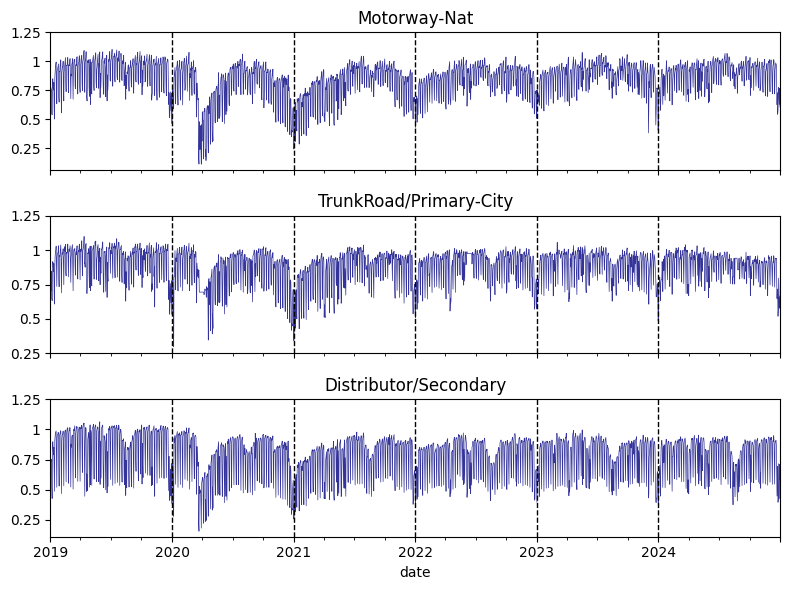

In [18]:
fig, ax = plt.subplots(3,1, figsize=(8,6), tight_layout = True, sharex=True)
row = 0

for rt in ['Motorway-Nat', 'TrunkRoad/Primary-City', 'Distributor/Secondary']:
    counts.annual_cycles.loc[rt].loc['2019-01-01':'2024-12-31'].plot(ax = ax[row], label =rt, alpha = 0.8, linewidth = 0.5, color = 'navy')

    ax[row].set_title(rt)
    yticks = [0.25, 0.5, 0.75, 1, 1.25]
    ytick_labels = [f'{tick}' for tick in yticks]  # You can customize labels if needed

    # Set the xtick marks and labels on the axis object
    ax[row].set_yticks(yticks)
    ax[row].set_yticklabels(ytick_labels)
    
    for year in [2020,2021,2022, 2023, 2024]:
        ax[row].axvline(f'{year}-01-01', color = 'black', linestyle = '--', linewidth=1)
    row +=1
    
for r in range(0,0):
    ax[r].set_xlabel('')
    ax[r].set_xticks([])
    ax[r].set_xticklabels([])


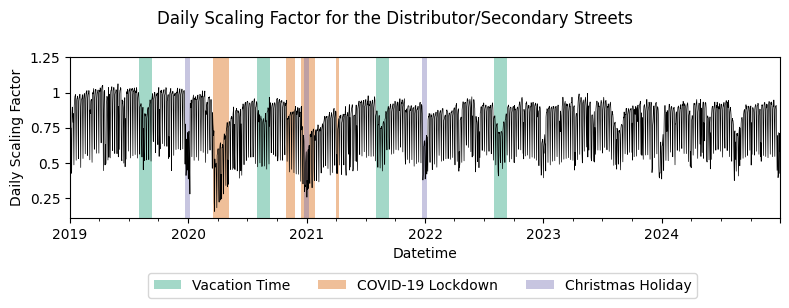

In [19]:
fig, ax = plt.subplots(1,1, figsize=(8,3), tight_layout = True, sharex=True)
row = 0

for rt in ['Distributor/Secondary']:
    counts.annual_cycles.loc[rt].loc['2019-01-01':'2024-12-31'].plot(ax = ax, label =rt, alpha =1, linewidth = 0.5, color = 'black')
    yticks = [0.25, 0.5, 0.75, 1, 1.25]
    ytick_labels = [f'{tick}' for tick in yticks]  # You can customize labels if needed

    # Set the xtick marks and labels on the axis object
    ax.set_yticks(yticks)
    ax.set_yticklabels(ytick_labels)
    
    #for year in [2020,2021,2022]:
        #ax.axvline(f'{year}-01-01', color = 'black', linestyle = '--', linewidth=1)
    #row +=1
    
lw = 0
a = 0.4

# summer holidays
plt.axvspan('2019-08-01', '2019-09-10', color=colors[0], alpha=a, linewidth =lw)
plt.axvspan('2020-08-01', '2020-09-10', color=colors[0], alpha=a, linewidth =lw)
plt.axvspan('2021-08-01', '2021-09-10', color=colors[0], alpha=a, linewidth =lw)
plt.axvspan('2022-08-01', '2022-09-10', color=colors[0], alpha=a, linewidth =lw)

# covid lockdowns
plt.axvspan('2020-03-16', '2020-05-06', color=colors[1], alpha=a, linewidth =lw)
plt.axvspan('2020-10-28', '2020-11-25', color=colors[1], alpha=a, linewidth =lw)
plt.axvspan('2020-12-13', '2021-01-25', color=colors[1], alpha=a, linewidth =lw)
plt.axvspan('2021-04-01', '2021-4-10', color=colors[1], alpha=a, linewidth =lw)

# christmas times
plt.axvspan('2019-12-23', '2020-01-07', color=colors[2], alpha=a, linewidth =lw)
plt.axvspan('2020-12-23', '2021-01-07', color=colors[2], alpha=a, linewidth =lw)
plt.axvspan('2021-12-23', '2022-01-07', color=colors[2], alpha=a, linewidth =lw)


ax.set_ylabel('Daily Scaling Factor')
ax.set_xlabel('Datetime')
plt.suptitle('Daily Scaling Factor for the Distributor/Secondary Streets')

legend_elements = [Patch(facecolor=colors[0], alpha =a, 
                         label='Vacation Time'),
                   Patch(facecolor=colors[1],alpha =a,
                         label='COVID-19 Lockdown'), 
                   Patch(facecolor=colors[2], alpha =a,
                         label='Christmas Holiday')]

ax.legend(handles=legend_elements, ncols = 3, loc='upper left', bbox_to_anchor=(0.1, -0.3),)

# Vehicle Shares 2019

KeyError: ('Distributor/Secondary', '2019', 'PC')

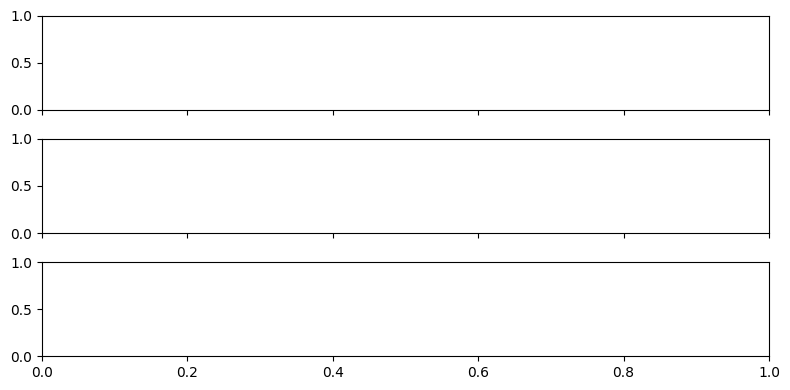

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(3,1, figsize=(8,4), tight_layout = True, sharex= True)

rt = 'Distributor/Secondary'

year = '2019'
ax0.plot(counts.vehicle_shares.loc[rt, 'PC', year]*100, label = 'PC', alpha = 1, linewidth = 1, color = colors[0])
ax1.plot(counts.vehicle_shares.loc[rt, 'HGV', year]*100, label = 'HGV', alpha = 1, linewidth = 1, color = colors[1])
ax1.plot(counts.vehicle_shares.loc[rt, 'LCV', year]*100, label = 'LCV', alpha = 1, linewidth = 1, color = colors[2])
ax2.plot(counts.vehicle_shares.loc[rt, 'BUS', year]*100, label = 'BUS', alpha = 1, linewidth = 1, color = colors[3])
ax2.plot(counts.vehicle_shares.loc[rt, 'MOT', year]*100, label = 'MOT', alpha = 1, linewidth = 1, color = colors[4])

ax0.set_ylim(70, 100)  # outliers only
ax1.set_ylim(0, 12)  # most of the data
ax2.set_ylim(0, 5)  # most of the data

ax0.spines.bottom.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)

ax0.tick_params(labeltop=False, bottom = False)  # don't put tick labels at the top
ax1.tick_params(labeltop=False, bottom = False)  # don't put tick labels at the top
ax2.tick_params(labeltop=False, labelbottom = True)  # don't put tick labels at the top

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax0.plot([0, 1], [0, 0], transform=ax0.transAxes, **kwargs)
ax1.plot([0, 1], [1, 1], transform=ax1.transAxes, **kwargs)

d = .3  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.suptitle('Vehicle Shares on Distributor/Secondary Streets in 2019')
ax1.set_ylabel('Vehicle Share [%]')
ax2.set_xlabel('')

# Collect labels from all subplots
handles = []
labels = []
for ax in [ax0, ax1, ax2]:
    for line in ax.get_lines():
        handles.append(line)
        labels.append(line.get_label())

# Create a legend for one plot
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.15, -0.5), ncol = 5)

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(3,1, figsize=(8,4), tight_layout = True, sharex= True)

rt = 'Motorway-Nat'

year = '2020'
ax0.plot(counts.vehicle_shares.loc[rt, year, 'PC']*100, label = 'PC', alpha = 0.8, linewidth = 1, color = colors[0])
ax1.plot(counts.vehicle_shares.loc[rt, year, 'HGV']*100, label = 'HGV', alpha = 0.8, linewidth = 1, color = colors[1])
ax1.plot(counts.vehicle_shares.loc[rt, year, 'LCV']*100, label = 'LCV', alpha = 0.8, linewidth = 1, color = colors[2])
ax2.plot(counts.vehicle_shares.loc[rt, year, 'BUS']*100, label = 'BUS', alpha = 0.8, linewidth = 1, color = colors[3])
ax2.plot(counts.vehicle_shares.loc[rt, year, 'MOT']*100, label = 'MOT', alpha = 0.8, linewidth = 1, color = colors[4])

ax0.set_ylim(50, 100)  # outliers only
ax1.set_ylim(0, 25)  # most of the data
ax2.set_ylim(0, 2)  # most of the data

ax0.spines.bottom.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)

ax0.tick_params(labeltop=False, bottom = False)  # don't put tick labels at the top
ax1.tick_params(labeltop=False, bottom = False)  # don't put tick labels at the top
ax2.tick_params(labeltop=False, labelbottom = True)  # don't put tick labels at the top

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax0.plot([0, 1], [0, 0], transform=ax0.transAxes, **kwargs)
ax1.plot([0, 1], [1, 1], transform=ax1.transAxes, **kwargs)

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.suptitle('Vehicle Shares on Motorway 2020')
ax1.set_ylabel('Vehicle Share [%]')

# Collect labels from all subplots
handles = []
labels = []
for ax in [ax0, ax1, ax2]:
    for line in ax.get_lines():
        handles.append(line)
        labels.append(line.get_label())

# Create a legend for one plot
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.15, -0.5), ncol = 5)

KeyError: ('Motorway-Nat', '2019', 'PC')

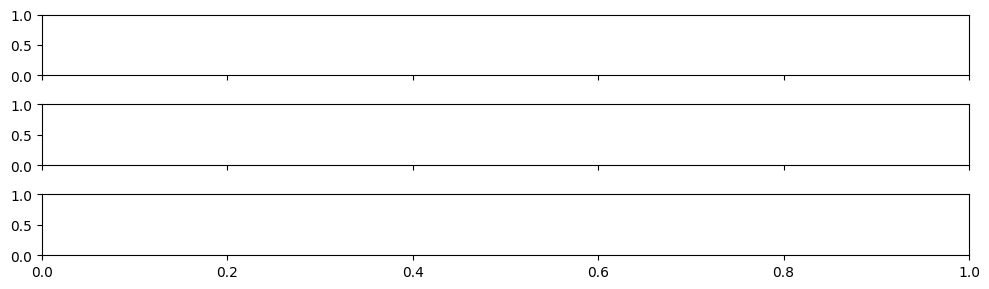

In [11]:
fig, (ax0, ax1, ax2) = plt.subplots(3,1, figsize=(10,3), tight_layout = True, sharex= True)

rt = 'Motorway-Nat'

year = '2019'
ax0.plot(counts.vehicle_shares.loc[rt, year, 'PC']*100, label = 'PC', alpha = 0.8, linewidth = 1, color = colors[0])
ax1.plot(counts.vehicle_shares.loc[rt, year, 'HGV']*100, label = 'HGV', alpha = 0.8, linewidth = 1, color = colors[1])
ax1.plot(counts.vehicle_shares.loc[rt, year, 'LCV']*100, label = 'LCV', alpha = 0.8, linewidth = 1, color = colors[2])
ax2.plot(counts.vehicle_shares.loc[rt, year, 'BUS']*100, label = 'BUS', alpha = 0.8, linewidth = 1, color = colors[3])
ax2.plot(counts.vehicle_shares.loc[rt, year, 'MOT']*100, label = 'MOT', alpha = 0.8, linewidth = 1, color = colors[4])

ax0.set_ylim(70, 100)  # outliers only
ax1.set_ylim(0, 18)  # most of the data
ax2.set_ylim(0, 1)  # most of the data

ax0.spines.bottom.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)

ax0.tick_params(labeltop=False, bottom = False)  # don't put tick labels at the top
ax1.tick_params(labeltop=False, bottom = False)  # don't put tick labels at the top
ax2.tick_params(labeltop=False, labelbottom = True)  # don't put tick labels at the top

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax0.plot([0, 1], [0, 0], transform=ax0.transAxes, **kwargs)
ax1.plot([0, 1], [1, 1], transform=ax1.transAxes, **kwargs)

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.suptitle('Vehicle Shares on Motorway 2019')
ax1.set_ylabel('Vehicle Share [%]')
ax2.set_xlabel('')

# Collect labels from all subplots
handles = []
labels = []
for ax in [ax0, ax1, ax2]:
    for line in ax.get_lines():
        handles.append(line)
        labels.append(line.get_label())

# Create a legend for one plot
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.15, -0.5), ncol = 5)

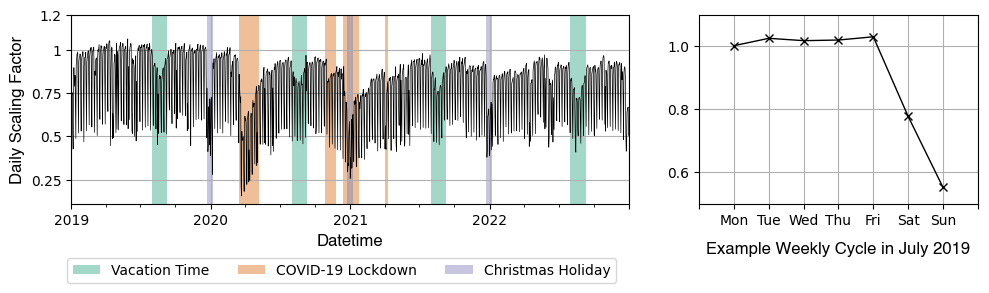

In [12]:
fig, ax = plt.subplots(1,2, width_ratios=(1,0.5), figsize=(10,3), tight_layout = True)
row = 0

for rt in ['Distributor/Secondary']:
    counts.annual_cycles.loc[rt].loc['2019-01-01':'2022-12-31'].plot(ax = ax[0], label =rt, alpha =1, linewidth = 0.5, color = 'black')
    yticks = [0.25, 0.5, 0.75, 1, 1.2]
    ytick_labels = [f'{tick}' for tick in yticks]  # You can customize labels if needed

    # Set the xtick marks and labels on the axis object
    ax[0].set_yticks(yticks)
    ax[0].set_yticklabels(ytick_labels)
    
    #for year in [2020,2021,2022]:
        #ax.axvline(f'{year}-01-01', color = 'black', linestyle = '--', linewidth=1)
    #row +=1
    
lw = 0
a = 0.4

# summer holidays
ax[0].axvspan('2019-08-01', '2019-09-10', color=colors[0], alpha=a, linewidth =lw)
ax[0].axvspan('2020-08-01', '2020-09-10', color=colors[0], alpha=a, linewidth =lw)
ax[0].axvspan('2021-08-01', '2021-09-10', color=colors[0], alpha=a, linewidth =lw)
ax[0].axvspan('2022-08-01', '2022-09-10', color=colors[0], alpha=a, linewidth =lw)

# covid lockdowns
ax[0].axvspan('2020-03-16', '2020-05-06', color=colors[1], alpha=a, linewidth =lw)
ax[0].axvspan('2020-10-28', '2020-11-25', color=colors[1], alpha=a, linewidth =lw)
ax[0].axvspan('2020-12-13', '2021-01-25', color=colors[1], alpha=a, linewidth =lw)
ax[0].axvspan('2021-04-01', '2021-4-10', color=colors[1], alpha=a, linewidth =lw)

# christmas times
ax[0].axvspan('2019-12-23', '2020-01-07', color=colors[2], alpha=a, linewidth =lw)
ax[0].axvspan('2020-12-23', '2021-01-07', color=colors[2], alpha=a, linewidth =lw)
ax[0].axvspan('2021-12-23', '2022-01-07', color=colors[2], alpha=a, linewidth =lw)


ax[0].set_ylabel('Daily Scaling Factor',fontsize = 12, font = 'Helvetica')
ax[0].set_xlabel('Datetime',fontsize = 12, font = 'Helvetica')
#plt.suptitle('Daily Scaling Factor for the Distributor/Secondary Streets')

legend_elements = [Patch(facecolor=colors[0], alpha =a, 
                         label='Vacation Time'),
                   Patch(facecolor=colors[1],alpha =a,
                         label='COVID-19 Lockdown'), 
                   Patch(facecolor=colors[2], alpha =a,
                         label='Christmas Holiday')]

ax[0].legend(handles=legend_elements, ncols = 3, loc='upper left', bbox_to_anchor=(-0.02, -0.25),)


counts.annual_cycles.loc[rt].loc['2019-07-08':'2019-07-14'].plot(ax = ax[1], alpha =1, linewidth = 1, color = 'black', marker = 'x')

ax[1].set_xticks(pd.date_range('2019-07-07', '2019-07-15', freq='D'))
ax[1].set_xticklabels([' ', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', ' '])
ax[1].set_xlabel('Example Weekly Cycle in July 2019', fontsize = 12, font = 'Helvetica', labelpad = 10)
ax[1].grid()
ax[1].set_ylim(0.5,1.1)
ax[0].grid()